# Dataset Loading



In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/iris.csv')

# Check the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#Data Pre-processing
##Handle Missing Values



In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numerical columns with their mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Verify if missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


##Convert Categorical Data to Numerical Format

In [7]:
# Check for categorical columns
print("\nData types of columns:")
print(df.dtypes)

# Apply one-hot encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)

print("\nData after encoding:")
print(df.head())



Data types of columns:
sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species_versicolor       bool
species_virginica        bool
dtype: object

Data after encoding:
   sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0           5.1          3.5           1.4          0.2               False   
1           4.9          3.0           1.4          0.2               False   
2           4.7          3.2           1.3          0.2               False   
3           4.6          3.1           1.5          0.2               False   
4           5.0          3.6           1.4          0.2               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  


##Normalize or Scale Numerical Data

In [9]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData after scaling numerical columns:")
print(df.head())



Data after scaling numerical columns:
   sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0     -0.900681     1.019004     -1.340227    -1.315444               False   
1     -1.143017    -0.131979     -1.340227    -1.315444               False   
2     -1.385353     0.328414     -1.397064    -1.315444               False   
3     -1.506521     0.098217     -1.283389    -1.315444               False   
4     -1.021849     1.249201     -1.340227    -1.315444               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  


##Check for Duplicate Rows

In [10]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("\nData after removing duplicates:")
print(df.head())



Number of duplicate rows:
1

Data after removing duplicates:
   sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0     -0.900681     1.019004     -1.340227    -1.315444               False   
1     -1.143017    -0.131979     -1.340227    -1.315444               False   
2     -1.385353     0.328414     -1.397064    -1.315444               False   
3     -1.506521     0.098217     -1.283389    -1.315444               False   
4     -1.021849     1.249201     -1.340227    -1.315444               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  


#Basic Exploratory Data Analysis (EDA)
##Summary Statistics

In [11]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       0.000352     0.005521     -0.005119    -0.006190
std        1.006725     1.004446      1.004767     1.003856
min       -1.870024    -2.433947     -1.567576    -1.447076
25%       -0.900681    -0.592373     -1.226552    -1.183812
50%       -0.052506    -0.131979      0.308059     0.132510
75%        0.674501     0.558611      0.762758     0.790671
max        2.492019     3.090775      1.785832     1.712096


## Visualizing Data

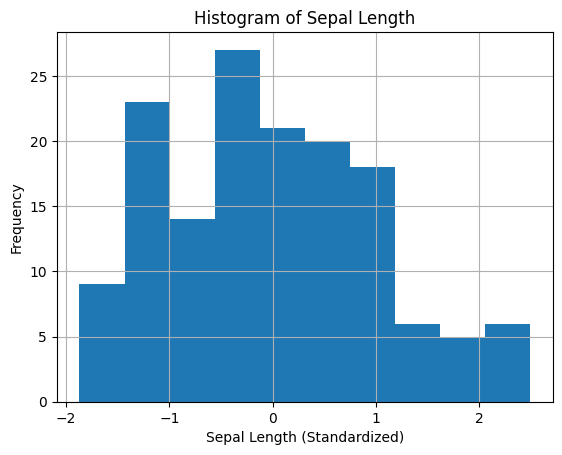

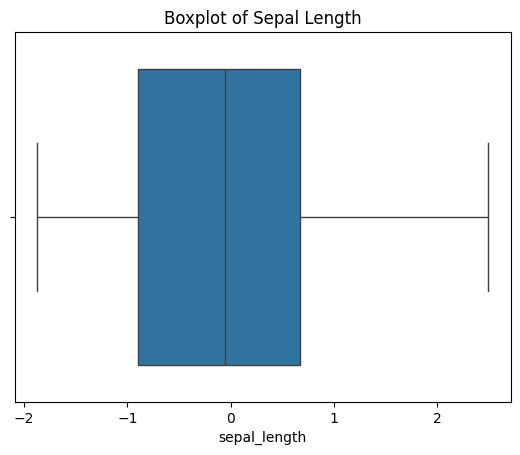

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical column
df['sepal_length'].hist()
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers
sns.boxplot(x=df['sepal_length'])
plt.title('Boxplot of Sepal Length')
plt.show()
